In [1]:
# Ignore cuDDa warning messages
import warnings
warnings.filterwarnings('ignore')

# Enable GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# # Expands the Jupyter Notebook Output Size to fit your window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load in tensorboard
%load_ext tensorboard

from tensorflow_models import TF_Models, Ein_Multiply, leaky_relu, rank_loss_func
from graph_predictions import Graph_Predictions

# tf.config.list_physical_devices()

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# # Update the directory since all files were moved to "ignorable_data"
# import os
# path = os.getcwd()
# os.chdir(path + '\ignorable_data')
# print(DMJ.data_splits['x_train'].shape)
# print(DMJ.data_splits['x_val'].shape)
# print(DMJ.data_splits['x_test'].shape)

In [ ]:
# tf.config.run_functions_eagerly(True)


# alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
alpha = [1e0, 1e1, 1e2, 1e3, 1e4]
# alpha.sort(reverse=True)

model_folder = './ignorable_data/models/[55, 25, 20]_split/'
results_folder = './ignorable_data/strategies/'
predictions_folder = './ignorable_data/prediction_results/[55, 25, 20]_splits/'
data_block_folder = './ignorable_data/datablocks/[55, 25, 20]_splits/'

DMJ = TF_Models('./ignorable_data/data_sets/NASDAQ_Cleaned', model_folder, reload=False)
data_splits = DMJ.split_data()

for a in alpha: 
    # Reset the training object to get rid of old data
    DMJ = TF_Models('./ignorable_data/data_sets/NASDAQ_Cleaned', model_folder, reload=False)

    # Create the model using parameters we're tuning
    DMJ._generate_model(model_type='lstm', loss_function='rank_loss', activation='leaky_relu', hidden_units=64, true_random=True, alpha=a, beta=1)

    # Have it train as much as it can
    DMJ.train_model_loop(epoch_batches=12)

    # Save the model with a tag
    DMJ.save_model(tag=f'E2E_LSTM_ALPHA{a}_SD100998_DropOut0_sliding10')
    # DMJ.save_model(tag=f'E2E_LSTM_ValSet_TFMSE_SD100998_expanding_window')

    # Reset the training object to get rid of old data
    GP = Graph_Predictions(model_folder, results_folder, 'x_val', DMJ)

    # Generate the prediction file
    GP.generate_validation_prediction_json(DMJ.model_name, predictions_folder, neural_net_type='lstm', sliding_window=10)

    # Create the diagnostics file for the most recently saved model
    GP.generate_model_diagnostics(predictions_folder + GP.model_name, datablock_folder=data_block_folder)

In [ ]:
model_folder = './ignorable_data/alpha_1000_beta_0.01/models'
model_folder = './ignorable_data/models/'
model_name = '01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--'

new_name = '01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--400_slidewindow'

directory = "./ignorable_data/alpha_1000_beta_0.01/models/"
predictions_folder = './ignorable_data/alpha_1000_beta_0.01/models/'

DMJ = TF_Models('./ignorable_data/data_sets/NASDAQ_Cleaned', model_folder, reload=False)

# For training over sliding window
# Reset the training object to get rid of old data
GP = Graph_Predictions(model_folder, "./ignorable_data/strategies/RL_validation_strategies", DMJ)

# Generate the prediction file
GP.generate_prediction_json(model_name, directory, neural_net_type='gcn', name_override=new_name, sliding_window=800)

# Create the diagnostics file for the most recently saved model
GP.generate_model_diagnostics(predictions_folder + GP.model_name, datablock_folder='./ignorable_data/alpha_1000_beta_0.01/data_blocks/')

In [ ]:
DMJ.history.history['val_loss']
DMJ.history.history['lr']
DMJ.epochs_n

In [ ]:
# Train the  model
model = DMJ.train_model(epochs=500)
# model = DMJ.train_model(model, data_splits['x_train'], data_splits['y_train'], data_splits['x_val'], data_splits['y_val'], epochs=50, learning_rate=5e-5, gcn_matrix=DMJ.Normalized_Adjacency_Matrix)

In [ ]:
DMJ.save_model(tag='E2E_LSTM_VariedLR_RL_ALPHA_1_NOMSE')

In [ ]:
xGP = Graph_Predictions("./models", "./strategies", DMJ)

In [ ]:
# GP.strategy_ratio_lstm('11-22-2020--17--32--LSTM--50Epochs--mse-Loss--64-HU--None', avoid_fall=False, name_override='test_')
# GP.strategy_ratio_lstm('11-22-2020--17--32--LSTM--50Epochs--mse-Loss--64-HU--None', avoid_fall=False, average=10, name_override='LSTM-MSE-50Epoch-Average10')
# GP.strategy_ratio_lstm('11-22-2020--17--32--LSTM--50Epochs--mse-Loss--64-HU--None', avoid_fall=True, name_override='LSTM-MSE-50Epoch-AvoidFall')

# GP.strategy_ratio_lstm('11-22-2020--14--55--LSTM-Rankloss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, name_override='LSTM-RankLoss-50Epoch')
# GP.strategy_ratio_lstm('11-22-2020--14--55--LSTM-Rankloss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, average=10, name_override='LSTM-RankLoss-50Epoch-Average10')
# GP.strategy_ratio_lstm('11-22-2020--14--55--LSTM-Rankloss--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, name_override='LSTM-RankLoss-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn(r'11-22-2020--16--31--GCN1-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN1-MSE-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--31--GCN1-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=True, name_override='GCN1-MSE-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn(r'11-22-2020--16--34--GCN1-Rankloss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN1-RankLoss-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--34--GCN1-Rankloss--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, name_override='GCN1-RankLoss-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn(r'11-22-2020--16--37--GCN2-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN2-MSE-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--37--GCN2-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=True, name_override='GCN2-MSE-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn(r'11-22-2020--16--39--GCN2-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN2-RankLoss-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--39--GCN2-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, name_override='GCN2-RankLoss-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn('11-22-2020--16--46--GCN3-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN3-MSE-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--46--GCN3-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=True, name_override='GCN3-MSE-50Epoch-AvoidFall-2ndBest')

# GP.strategy_ratio_gcn('11-22-2020--16--43--GCN3-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN3-RankLoss-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--43--GCN3-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, name_override='GCN3-RankLoss-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn('11-22-2020--20--46--GCN3-MSE-Ratio+1--50Epochs--mse-Loss--64-HU--', avoid_fall=True, average=1, name_override='GCN3-MSE-200Epoch-Ratio+1')
# GP.strategy_ratio_gcn('11-22-2020--20--43--GCN3-RankLoss-Ratio+1--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, average=1, name_override='GCN3-RankLoss-200Epoch-Ratio+1')

'''New prediction memory storage'''
# GP.generate_prediction_json('11-22-2020--15--01--LSTM-MSE--50Epochs--mse-Loss--64-HU--', neural_net_type='lstm')
# GP.generate_prediction_json('11-22-2020--16--46--GCN3-MSE--50Epochs--mse-Loss--64-HU--', neural_net_type='gcn')

'''Seperately trained LSTM combo'''
# GP.generate_prediction_json('01-04-2021--14--20--SEP_LSTM_GCN3-1e-5LR--70Epochs--mse-Loss--64-HU--', neural_net_type='gcn')

''''''
GP.generate_prediction_json('02-04-2021--15--11--E2E_LSTM_VariedLR_RL_ALPHA_1_NOMSE--500Epochs--rlf-Loss--64-HU--', neural_net_type='lstm')

In [ ]:
strat_name = '02-04-2021--15--11--E2E_LSTM_VariedLR_RL_ALPHA_1_NOMSE--500Epochs--rlf-Loss--64-HU--_PM'

# Testing the PM file feature
avg = [1, 5, 20, 50, 100, 200]
avg = [1]
for a in avg:
#     GP.prediction_json_strategy_max_entities(strat_name, average=a, avoid_fall=False, name_override=strat_name+ f'{a}AVG')
    GP.prediction_json_strategy_determine_best(strat_name, average=a, avoid_fall=False, name_override=strat_name+ f'{a}AVG_Correct_BuyDay_plus1')
    GP.save_results()
# Testing the mse tracking feature
# GP.prediction_json_mse('01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--_PM')
GP.save_results()

In [ ]:
GP.generate_model_diagnostics('02-04-2021--15--11--E2E_LSTM_VariedLR_RL_ALPHA_1_NOMSE--500Epochs--rlf-Loss--64-HU--_PM', datablock_folder='RL_validation_set')

'01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--_PM'
255025890000.0
0.012249682697757544
0.7766990291262136


In [ ]:
# GP.generate_upper_lower_avg_bounds()

GP.display_graph()

In [ ]:
# GP.strategy_ratio_gcn('11-22-2020--16--46--GCN3-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN3-MSE-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--46--GCN3-MSE--50Epochs--mse-Loss--64-HU--', avoid_fall=True, name_override='GCN3-MSE-50Epoch-AvoidFall')

# GP.strategy_ratio_gcn('11-22-2020--16--43--GCN3-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=False, average=10, name_override='GCN3-RankLoss-50Epoch-Average10')
# GP.strategy_ratio_gcn(r'11-22-2020--16--43--GCN3-RankLoss--50Epochs--rlf-Loss--64-HU--', avoid_fall=True, name_override='GCN3-RankLoss-50Epoch-AvoidFall')

In [ ]:
# GP.save_results('./strategies')

In [ ]:
import ipywidgets as widgets
from ipywidgets import GridBox

In [ ]:
import time
bar = widgets.IntProgress(min=0, max=10, description='Loading:', bar_style='info')
display(bar)

for i in range(11):
    time.sleep(0.2)
    bar.value = i

In [ ]:

widgets.Text(
    value='Loading',
    description='',
    disabled=True
    layout=L
)



In [ ]:
# Start the loading bar by initializing it
nam_bar = widgets.IntProgress(min=0, max=5, value=0, description='Loading Normalized Adjacency Matrix:',
                              layout=widgets.Layout(width='auto'))
text = widgets.Text(value='Loading', description='', disabled=True, layout=widgets.Layout(width='auto'))

test = widgets.GridBox(children=[text, nam_bar], layout=widgets.Layout(width='auto'))

display(test)

In [ ]:
x_test = [1, 2, 3, 4, 5]

In [ ]:
x_test[0:1]

In [ ]:
for i in range(0, 10):
    print(i)

In [ ]:
%tensorboard --logdir logs/fit


In [ ]:
import numpy as np
np.amax(GP.rr_test[:, 0])

In [ ]:
np.argmax(GP.rr_test[:, 0])

In [ ]:
GP.rr_test[476,0]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(GP.rr_test[5, :], GP.rr_test[100, :])

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

trials_RL = []
for e in range(100,300):
    RL = []
    for t in range(300):
        A = []; B = [];
        for l in range(e):
            n = random.uniform(-1, 1)
            A.append(n)
            B.append(n)
        swap_random(B)
        swap_random(B)
        swap_random(B)
        swap_random(B)
        
        return_ratio = tf.constant(A, shape=(len(A), 1))
        ground_truth = tf.constant(B, shape=(len(B), 1))

        ###############################################################
        # Create an array of all_ones so that we can calculate all permutations of subtractions
        all_ones = tf.ones([len(return_ratio), 1], dtype=tf.float32)

        # Creates a N x N matrix with every predicted return ratio for each company subtracted with every other
        # company
        pred_dif = tf.math.subtract(
            tf.matmul(return_ratio, all_ones, transpose_b=True),
            tf.matmul(all_ones, return_ratio, transpose_b=True)
        )

        # Creates an N x N matrix containing every actual return ratio for each company subtracted with every other
        # company By switching the order of the all_ones matricies and the actual prices, a negative sign is introduced
        # When RELU is applied later, correct predictions will not affect loss while incorrect predictions will affect
        # loss depending on how incorrect the prediction was
        actual_dif = tf.math.subtract(
            tf.matmul(all_ones, ground_truth, transpose_b=True),
            tf.matmul(ground_truth, all_ones, transpose_b=True)
        )

        # Using the above two qualities, the algorithm can be punished for incorrectly calculating when a company is
        # doing better than another company Reduces the mean across each dimension until only 1 value remains
        rank_loss = tf.reduce_mean(
            # Takes if a given value is >0, it is kept, otherwise, it becomes 0
            tf.nn.relu(
                # Multiplies all of the
                tf.multiply(pred_dif, actual_dif)
            )
        )
        RL.append(rank_loss)
    trials_RL.append(np.mean(RL))

plt.plot(trials_RL)

In [ ]:
r = [0.1, 0.5, 0.2, 0.3]
print(list(zip(range(4), r)))

In [ ]:
predictions = [100, 300, 200, 400]
predictions = list(zip(range(len(predictions)), predictions))
predictions

In [ ]:
predictions.sort(key=lambda x: x[1], reverse=True)
predictions

In [ ]:
import numpy as np

# Normal Rank
A = list(range(1, 10001))
B = [i**(-1) for i in A]
print(np.mean(A))
print(np.mean(B)**-1)


'000_Avg_RR.p'
'000_Highest_RR_Possible.p'
'000_Lowest_RR_Possible.p'

In [ ]:
import similaritymeasures as sm
import numpy as np

# Generate random experimental data
n = 5
x = list(range(n))
y = [11, 26, 26, 11, -60]
exp_data = np.zeros((n, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generate random numerical data
x = list(range(n))
y = [1, 2, 30, 4, -9000]
num_data = np.zeros((n, 2))
num_data[:, 0] = x
num_data[:, 1] = y

area = sm.area_between_two_curves(exp_data, num_data)
print(area)

In [ ]:
pm_name = 'uhhhh.json'
# If the .json file was already attached, this will fix the problem
pm_name = pm_name.split('.json')
pm_name = pm_name[0]

In [ ]:
print(pm_name)

In [4]:
model_folder = './ignorable_data/alpha_1000_beta_0.01/models'
model_folder = './ignorable_data/models/'
model_name = '01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--'

new_name = '01-04-2021--15--57--SEP_LSTM_GCN3-5e-6LR--820Epochs--mse-Loss--64-HU--400_slidewindow'

directory = "./ignorable_data/alpha_1000_beta_0.01/models/"
predictions_folder = './ignorable_data/alpha_1000_beta_0.01/models/'

DMJ = TF_Models('./ignorable_data/data_sets/NASDAQ_Cleaned', model_folder, reload=False)

# For training over sliding window
# Reset the training object to get rid of old data
GP = Graph_Predictions(model_folder, "./ignorable_data/strategies/RL_validation_strategies", 'x_val', DMJ)

directory = './ignorable_data/prediction_results/[55, 25, 20]_splits/'
model = '02-13-2021--23--27-E2E_1LSTM_ReturnSeqTrue_Outputsize[None,683,1]_VariedLR_TFMSE_Dropout0.5_-108Epochs-mse-Loss-64-HU-_683window_PM'
GP.generate_model_diagnostics(directory + model, datablock_folder='./ignorable_data/datablocks/[55, 25, 20]_splits/')

we're out baby


In [24]:
# import numpy as np
# for i in range(GP.test_obj.shape[0]):
#     print(np.argmax(GP.test_obj[i]))
GP.test_obj[0]

array([0.04342359, 0.04119842, 0.05864105, 0.07902957, 0.09087781,
       0.04185348, 0.07068139, 0.04110918, 0.02539998, 0.04790636,
       0.05832908, 0.04458663, 0.07172409, 0.07192592, 0.06663913,
       0.08135604, 0.09721243, 0.06090426, 0.03716227, 0.06083799,
       0.06348862, 0.10426967, 0.04374418, 0.08586936, 0.03508477,
       0.092379  , 0.03232364, 0.0475781 , 0.0526994 , 0.05984573,
       0.1035826 , 0.06954417, 0.07910027, 0.08434433, 0.05907116,
       0.06662738, 0.04066036, 0.07948153, 0.02880796, 0.04781285,
       0.04084376, 0.03089666, 0.08824629, 0.06137196, 0.03706343,
       0.02707023, 0.07315287, 0.03468054, 0.06104265, 0.06318755,
       0.05597892, 0.07523824, 0.0480017 , 0.03879616, 0.03820492,
       0.06710581, 0.06023788, 0.05709454, 0.0706509 , 0.03493707,
       0.05987395, 0.04527026, 0.0521309 , 0.09227718, 0.07886332,
       0.0550091 , 0.03698212, 0.10815957, 0.05425001, 0.07224297,
       0.09623867, 0.07208976, 0.06652603, 0.08467798, 0.05069

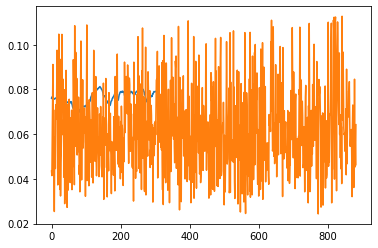

In [15]:
import matplotlib.pyplot as plt
plt.plot(GP.test_obj[:, 78])
# plt.plot(GP.test_obj[1])